In [11]:
import gym
import numpy as np
import sys
import csv

In [12]:
env = gym.make('MountainCarContinuous-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [12]:
state = env.reset()
total_rewards = 0
for i in range(500):
    action = env.action_space.sample()
    env.render()
    next_state,reward,done,_ = env.step(action)
    total_rewards += reward

env.close()
print(total_rewards)
    

-16.86403460299585


In [13]:
from agents.DDPG import DDPG

In [14]:
agent = DDPG(env)

In [15]:
episodes = 500
rewards = []
filename = 'training_log.txt'

with open(filename,'w') as csvfile:
    writer = csv.writer(csvfile)
    
    for i in range(episodes):
        state = agent.reset_episode(env)
        score = 0

        while True:
            action = agent.act(state)
            next_state,reward,done,_ = env.step(action)
            agent.step(action,reward,next_state,done)
            state = next_state
            score += reward
            if done:
                rewards.append(score)
                break
        log = 'Episode:' + str(i) + 'Reward:' + str(score) 
        writer.writerow(log)
        print("\rEpisode:{}, Average Score: {}".format(i,np.mean(rewards)),end="")
        sys.stdout.flush()
        agent.save_model('./trained_actor.h5')
    

Episode:499, Average Score: 10.221493120680643

In [18]:
env = gym.make('MountainCarContinuous-v0')
state = env.reset()
total_rewards = 0
agent.load_model('./trained_actor.h5')
while True:
    action = agent.act_only(state)
    env.render()
    next_state,reward,done,_ = env.step(action)
    state = next_state
    total_rewards += reward
    
    if done:
        break

env.close()
print(total_rewards)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
-99.8999999999986


In [20]:
np.mean(rewards)

10.221493120680643

In [22]:
import matplotlib.pyplot as plt

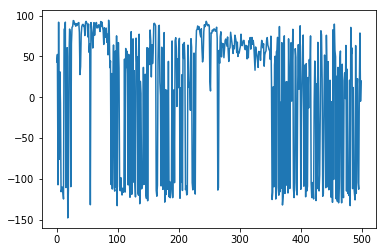

In [23]:
plt.plot(rewards)